In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt



In [27]:
(xtrain , ytrain),(xtest,ytest) = mnist.load_data()

In [36]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
random_num = np.random.randint(0,len(xtrain))

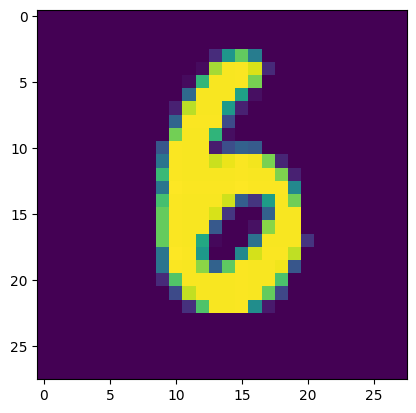

In [58]:
random_num = np.random.randint(0,len(xtrain))
plt.imshow(xtrain[random_num])

In [67]:
xtrain = xtrain / 255
xtest = xtest / 255

In [77]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [78]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [92]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [136]:
history  = model.fit(xtrain,ytrain,epochs = 12,validation_split = 0.2)

Epoch 1/12
1500/1500 [==============================] - 11s 7ms/step - loss: 1.2397 - accuracy: 0.6225 - val_loss: 1.2120 - val_accuracy: 0.6401
Epoch 2/12
1500/1500 [==============================] - 10s 7ms/step - loss: 1.2289 - accuracy: 0.6270 - val_loss: 1.2019 - val_accuracy: 0.6389
Epoch 3/12
1500/1500 [==============================] - 9s 6ms/step - loss: 1.2185 - accuracy: 0.6279 - val_loss: 1.1939 - val_accuracy: 0.6522
Epoch 4/12
1500/1500 [==============================] - 10s 7ms/step - loss: 1.2082 - accuracy: 0.6320 - val_loss: 1.1809 - val_accuracy: 0.6485
Epoch 5/12
1500/1500 [==============================] - 11s 7ms/step - loss: 1.1980 - accuracy: 0.6341 - val_loss: 1.1701 - val_accuracy: 0.6501
Epoch 6/12
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1882 - accuracy: 0.6372 - val_loss: 1.1620 - val_accuracy: 0.6489
Epoch 7/12
1500/1500 [==============================] - 9s 6ms/step - loss: 1.1786 - accuracy: 0.6407 - val_loss: 1.1527 - val_accur

In [137]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [138]:
y_pred = model.predict(xtest)

313/313 [==============================] - 1s 2ms/step


In [111]:
y_pred[0]

array([0.0009125 , 0.09109364, 0.00398933, 0.05345867, 0.10985328,
       0.0556971 , 0.00285776, 0.3885204 , 0.06731196, 0.22630532],
      dtype=float32)

In [139]:
hello = y_pred.argmax(axis = 1)

In [140]:
hello

array([7, 2, 1, ..., 9, 8, 6])

In [141]:
ytest

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [142]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,hello)

0.6563

In [147]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

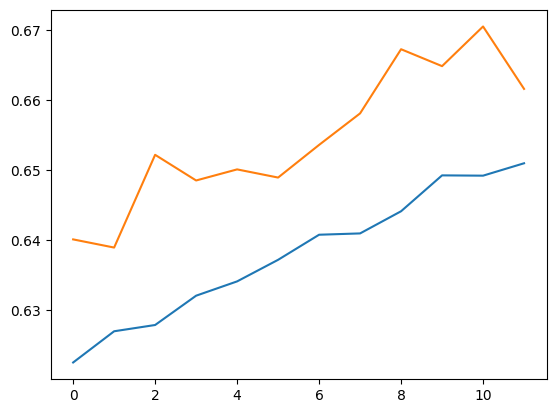

In [154]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


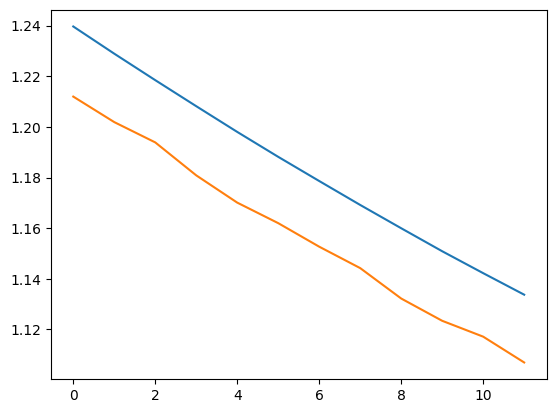

In [155]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
